## Motivation 

Motivation of this notebook is to analyse UCI Winconsin breast cancer data. This dataset is available on UCI machine learning webpage (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

features are extracted from digitized images of breast mass and they describe characterizations of cell nuclei.  

It contains data from over 500 cancer patients and the goal of this dataset is to find a way to predict if tumor is malignant or benign.

Ideally I will be able to create a model which can predict if cell type with over 95% accuracy, with as few false negatives as possible

NOTE: data is not included in this git repo, if you want to check dataset yourself download it from link provided above

In [1]:
## common import and preparations for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
np.set_printoptions(suppress=False)
pd.set_option("display.max_rows", 10)

### Exploratory data analysis

The purpose of this section is to understand this particular dataset, distributions, correlations, etc. before producing any models, as well as to make sure dataset is clean.

In [3]:
Data = pd.read_csv("./data.csv")
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
Data['Unnamed: 32'].unique()

array([nan])

In [5]:
#Get rid of last column, it's completelly empty and check if any values are missing. Also get rid 
#of first column. I have no use for unique patient ID
Data = Data.iloc[:, 1:-1]
Data.isna().any().unique()

array([False])

No missing data. Uniquely clean dataset ;) 

Usually cancer cells have unusual nucleus shape but this is far more obvious in malignant cells. Let's check
if our data shows any difference between benign and malignant cells

In [6]:
Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
Data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


let's check the distribution of malignant VS benign tumors

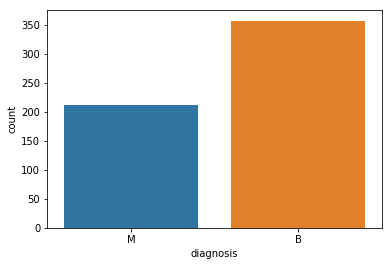

In [8]:
sns.countplot(Data.diagnosis)

From above summary of data I can see that my features are not on the same scale. Some of them are much larger than others, thus I will need to normalise them.

In [9]:
Data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

/home/sim/studies/data_sci/elarning_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


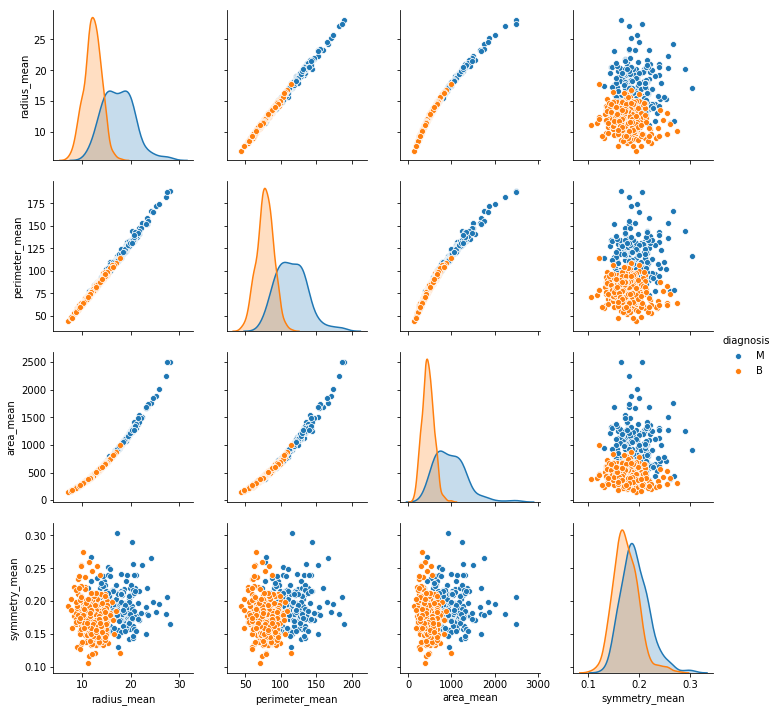

In [10]:
sns.pairplot(Data, hue='diagnosis', vars=['radius_mean', 'perimeter_mean', 'area_mean', 'symmetry_mean'])

There seems to be some overlap between all of these parameters. I'm a bit surprised there is so little difference between malignant and benign cancer nucleus symmetry.

Looking at these graphs I think there is a lot of correlation between my variables. let's check correlation heatmap

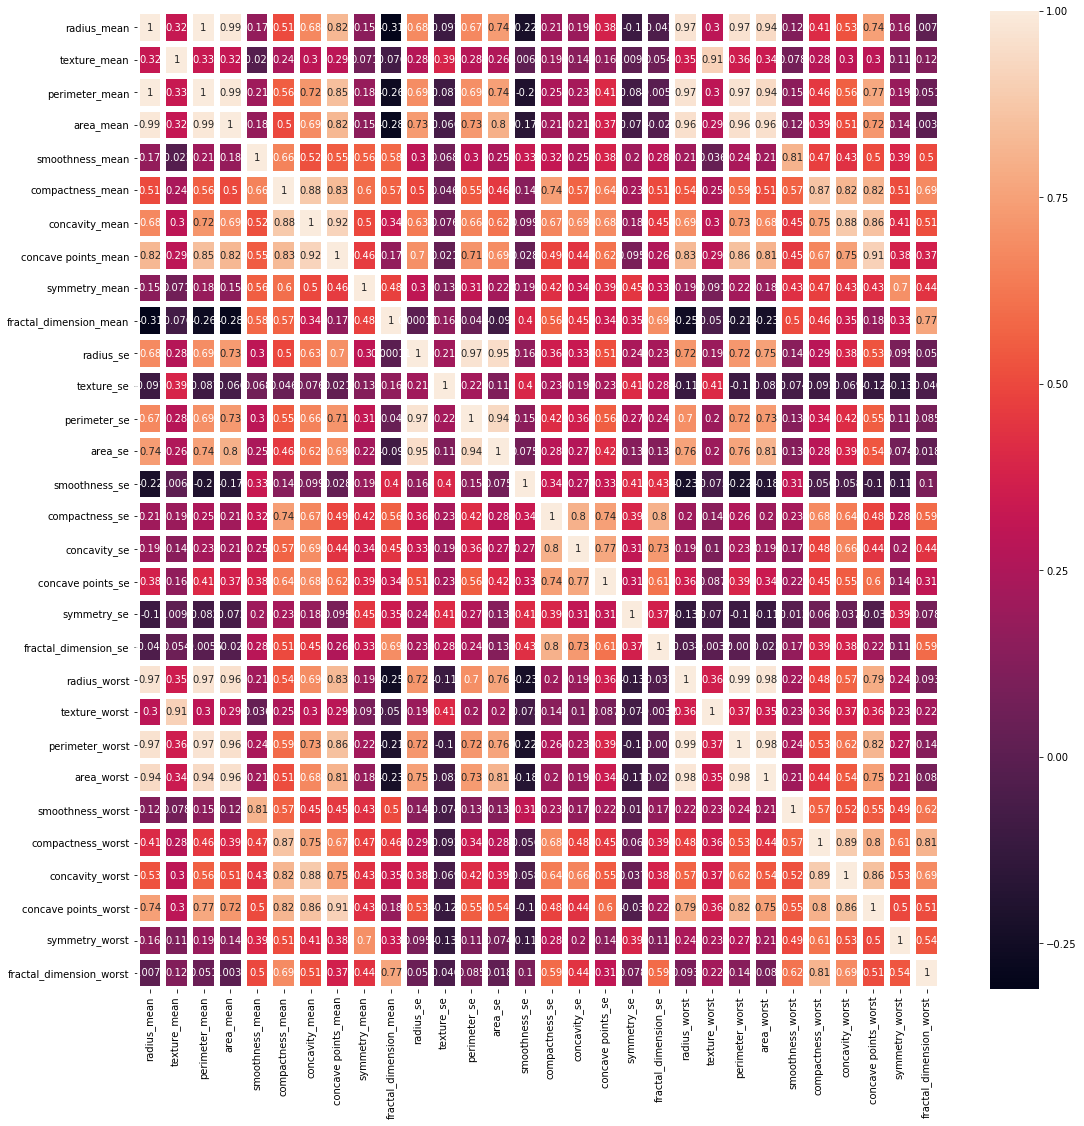

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 18)

sns.heatmap(Data.corr(), annot=True, linewidths=5, ax=ax)

In [12]:
#number of features where correlation is above 0.5
np.sum((Data.corr() > 0.5).iloc[:,0])

14

14 features have a high correlation. Some dimensional reduuction will be required when I'm producing predictive model

## Data preprocessing and model creation

Now that I have idea with what kind of data I'm working, I will perprocess my data and create few models to check how it fits

In [13]:
#preprocessing imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score #I will be using f1 as my main score metric

In [14]:
Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X = Data.iloc[:, 1:]
y = Data.iloc[:,0] # Diagnosis variable

In [16]:
#I will use validation set only at the very end to check if my model work fine
#I will be doing all testing and hyperparameter tunning on  test set
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, test_size=0.2, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

First I will be creating simple models with all variables, then comprate it with other models

In [17]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)
y_val = enc.transform(y_val) #I will need to transform it anyway, might as well do it here

In [18]:
def pred(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """Convenient function to produce and return scores faster"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    accu = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return score, cm, accu

In [19]:
#Generate simple Logistic regression model with all data
simple_log_reg, simple_log_reg_cm, simple_log_reg_accu = pred(LogisticRegression(random_state=42, solver="liblinear"))
print ("Simple logistic regression score is: %f" %simple_log_reg)
print ("Simple logistic regression accuracy is: %f" %simple_log_reg_accu)

#Generate simple SVC model with all data
simple_svc, simple_svc_cm, simple_svc_accu = pred(SVC(random_state=42, gamma='auto'))
print("Simple SVC score is: %f" %simple_svc)
print("Simple SVC accuracy is: %f" %simple_svc_accu)

#Collect result for future reference
results = {}
results['simple_log_reg'] = simple_log_reg
results['simple_svc'] = simple_svc

Simple logistic regression score is: 0.944444
Simple logistic regression accuracy is: 0.956044
Simple SVC score is: 0.000000
Simple SVC accuracy is: 0.604396


/home/sim/studies/data_sci/elarning_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


OK, Logistic regression did far better than expected. In fact it seems to be a great model, even without any 
feature scaling or demention reduction. 


And SVC just sucks at this...

In [20]:
#Scalling X values
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,...,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02
mean,-3.347749e-15,-9.394195e-16,8.540177e-16,-3.952882e-16,-2.035002e-15,3.416071e-17,-7.710560e-16,-3.660076e-16,5.856121e-17,1.561632e-16,...,-2.979302e-15,1.317627e-15,4.489693e-16,-2.830459e-16,1.234666e-15,1.708035e-16,2.440051e-17,-3.074464e-16,2.928061e-16,1.239546e-15
std,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,...,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00,1.001376e+00
min,-1.812679e+00,-2.222299e+00,-1.800275e+00,-1.351076e+00,-3.034880e+00,-1.555239e+00,-1.090362e+00,-1.242031e+00,-2.279250e+00,-1.736612e+00,...,-1.549079e+00,-2.226320e+00,-1.552712e+00,-1.122150e+00,-2.169231e+00,-1.360169e+00,-1.299393e+00,-1.710503e+00,-2.082614e+00,-1.547210e+00
25%,-6.822013e-01,-6.945909e-01,-6.898678e-01,-6.599538e-01,-7.139735e-01,-7.590974e-01,-7.549924e-01,-7.302432e-01,-7.025697e-01,-7.203485e-01,...,-6.533334e-01,-7.459608e-01,-6.815990e-01,-6.160881e-01,-7.511134e-01,-7.058538e-01,-7.704106e-01,-7.585759e-01,-6.308647e-01,-7.122429e-01
50%,-2.201997e-01,-1.117113e-01,-2.233312e-01,-2.886277e-01,-1.028044e-01,-2.917908e-01,-3.540330e-01,-3.901560e-01,-7.781469e-02,-1.510245e-01,...,-2.530492e-01,-4.586923e-02,-2.620803e-01,-3.198324e-01,-6.249799e-02,-2.863405e-01,-2.416707e-01,-2.203197e-01,-1.202918e-01,-2.412257e-01
75%,4.756544e-01,5.634184e-01,5.108632e-01,3.222270e-01,6.185184e-01,5.119765e-01,5.099044e-01,5.892277e-01,5.164857e-01,4.595452e-01,...,4.040797e-01,6.505028e-01,5.108664e-01,2.471480e-01,6.185857e-01,5.713486e-01,5.390695e-01,6.647791e-01,4.221918e-01,4.382986e-01
max,4.010537e+00,4.727600e+00,4.024389e+00,5.247570e+00,4.699962e+00,3.876119e+00,4.257016e+00,3.988281e+00,4.239782e+00,4.684173e+00,...,4.118489e+00,3.976144e+00,4.316670e+00,5.877874e+00,3.733494e+00,4.308075e+00,4.376072e+00,2.689288e+00,5.719000e+00,4.775542e+00


Now all variables seem to be on similar scale ;)

Another Linear regression + SVC pair to check how scaling affected results

In [22]:
log_reg_scaled, log_reg_scaled_cm, log_reg_scaled_accu = pred(LogisticRegression(random_state=42, 
                                                                                 solver='liblinear'))
svc_scaled, svc_scaled_cm, svc_scaled_accu = pred(SVC(random_state=42, gamma='auto'))

print ("Logistic regression with scaled variables score is: %f" %log_reg_scaled)
print ("And accuracy is: %f" %log_reg_scaled_accu)

print ("SVC with scalled varaibles score is %f" %svc_scaled)
print ("And accuracy is %f" %svc_scaled_accu)

results['Log_reg_scaled'] = log_reg_scaled
results['SVC_scaled'] = svc_scaled

Logistic regression with scaled variables score is: 0.944444
And accuracy is: 0.956044
SVC with scalled varaibles score is 0.000000
And accuracy is 0.604396


/home/sim/studies/data_sci/elarning_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Not that different from previous results. In fact scalling varaibles didn't make any difference. Well, not it's time to do some dimension reduction

I'll be using Principal Component Analysis

In [23]:
np.shape(X_train)

(364, 30)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [26]:
pca.explained_variance_ratio_

array([0.4378869 , 0.19764478, 0.09889176, 0.06464687, 0.05076894,
       0.04182938, 0.02167884, 0.01597905, 0.01228728, 0.01114783])

In [27]:
pd.DataFrame(X_train_reduced).head()

,0,1,2,3,4,5,6,7,8,9
0,1.287812,0.885386,0.043191,-1.958917,0.142341,0.863047,-0.177122,-0.728505,0.444899,-0.538567
1,6.004199,3.344391,-3.456276,3.452798,2.056015,0.422624,0.620567,0.434432,-0.000789,-0.570634
2,-0.530029,0.627633,-0.460176,-0.021672,-0.180277,-0.595747,0.093930,-0.191667,-0.285932,-0.341913
3,-2.148883,-1.171395,-0.082375,-1.389864,-0.050579,-0.026701,-0.638873,-0.156953,0.531951,-0.267918
4,0.269438,6.968535,0.024045,1.534358,0.631982,-0.765294,1.457991,1.001293,-0.503089,1.926719


Now that I've applied PCA, it has collapsed my 30 features into 10 features. Time to check if it affects models ;)

In [28]:
log_reg_pca, log_reg_pca_cm, log_reg_pca_accu = pred(LogisticRegression(solver='liblinear', random_state=42),
                                                    X_train=X_train_reduced, X_test=X_test_reduced)

print ("Logistic regression with reduced dimensions score is: %f" %log_reg_pca)
print ("And accuracy is: %f" %log_reg_pca_accu)

svc_pca, svc_pca_cm, svc_pca_accu = pred(SVC(random_state=42, gamma='auto'),
                                         X_train=X_train_reduced, X_test=X_test_reduced)

print ("SVC with reduced dimensions score is: %f" %svc_pca)
print ("And accuracy is: %f" %svc_pca_accu)

results['log_reg_pca'] = log_reg_pca
results['svc_pca'] = svc_pca

Logistic regression with reduced dimensions score is: 0.957746
And accuracy is: 0.967033
SVC with reduced dimensions score is: 0.931507
And accuracy is: 0.945055


And finally our SVC model give something back ;)
It's still worse than logistic regression
Let's check confusion matrix now

In [29]:
log_reg_pca_cm

array([[54,  1],
       [ 2, 34]])

In [30]:
svc_pca_cm

array([[52,  3],
       [ 2, 34]])

10 dimensions is still a lot and I'm not sure if I need them all for linear regression


I'll use RFE from sklearn to get rid of least important features one by one and check results

In [31]:
from sklearn.feature_selection import RFE

def gen_regressor(X, y):
    regressor = LogisticRegression(random_state=42, solver='liblinear')
    regressor.fit(X, y)
    
    return regressor

def genScore(y_test, y_pred):
    return f1_score(y_test, y_pred)

def getRidVar(X_train, X_test, y_train, y_test):
    """This function takes a FULL list of variables and drops half of them at each itterator and prints F1 score"""
    score = 0
    score_old = 0
    
    while True:
        print("-=-" * 10)
        regressor = gen_regressor(X_train, y_train)
        y_pred = regressor.predict(X_test)
        score_old = score
        score = genScore(y_test, y_pred)
        print("Generated a model, F1 score is %f" %score)
        num_var = np.shape(X_train)[1]
        print("We are left with %i variables" %num_var)
        
        #Break if we are out of features.
        if num_var <= 1:
            print ("Out of features!!!")
            break
            
        #Check if old score if not equal to 0
        if score_old != 0:
            if score < score_old:
                print("F1 score has decreased!!!")
                X_test = X_test_old
                X_train = X_train_old
                break
        
        #Let's step carefully here. Let's remove one feature at a time
        estimator = LogisticRegression(random_state=42)
        selector = RFE(estimator,num_var-1,  step=1).fit(X_train, y_train)
        X_train_old = X_train
        X_test_old = X_test
        X_train = selector.transform(X_train)
        X_test = selector.transform(X_test)
        
    return X_train, X_test

In [32]:
X_sel_train, X_sel_test = getRidVar(X_train_reduced, X_test_reduced, y_train, y_test)

-=--=--=--=--=--=--=--=--=--=-
Generated a model, F1 score is 0.957746
We are left with 10 variables
-=--=--=--=--=--=--=--=--=--=-
Generated a model, F1 score is 0.957746
We are left with 9 variables
-=--=--=--=--=--=--=--=--=--=-
Generated a model, F1 score is 0.957746
We are left with 8 variables
-=--=--=--=--=--=--=--=--=--=-
Generated a model, F1 score is 0.957746
We are left with 7 variables
-=--=--=--=--=--=--=--=--=--=-
Generated a model, F1 score is 0.957746
We are left with 6 variables
-=--=--=--=--=--=--=--=--=--=-
Generated a model, F1 score is 0.929577
We are left with 5 variables
F1 score has decreased!!!


/home/sim/studies/data_sci/elarning_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sim/studies/data_sci/elarning_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sim/studies/data_sci/elarning_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sim/studies/data_sci/elarning_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sim/studies/data_sci/elarning_env/lib/python3.7/site-packages/sklearn/

Well, now I'm left with 6 features. It seems these features don't affect Logistic regression buut they might affect SVC. So this is the last model for now ;)

In [33]:
svc_sel, svc_sel_cm, svc_sel_accu = pred(SVC(random_state=42, gamma='auto'),
                                         X_train=X_sel_train, X_test=X_sel_test)

print ("SVC with reduced dimensions and features selected via RFE score is: %f" %svc_sel)
print ("And accuracy is: %f" %svc_sel_accu)

results['svc_sel'] = svc_sel

SVC with reduced dimensions and features selected via RFE score is: 0.931507
And accuracy is: 0.945055


It seems that both accuracy and F1 score are the same as before

In [34]:
results

{'simple_log_reg': 0.9444444444444444,
 'simple_svc': 0.0,
 'Log_reg_scaled': 0.9444444444444444,
 'SVC_scaled': 0.0,
 'log_reg_pca': 0.9577464788732395,
 'svc_pca': 0.9315068493150684,
 'svc_sel': 0.9315068493150684}

So at the moment it seems logistic regression with reduced dimensions provides the best results. On top of that, judging from confiusion matrix it seems it might produce very few false negatives

I haven't been adjusting any hyper parameters for any models so I guess that's something that can be done in the future ;)

In [35]:
#C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_param_range = 10.0**np.arange(-10, 10) #Powers of 10, from a very small value to a very large value
for C in C_param_range:
    C_accu, _, _ = pred(LogisticRegression(random_state=42, solver='liblinear', C = C),
                       X_train=X_train_reduced, X_test=X_test_reduced)
    
    print("Accuracy for %f C value is %f" %(C, C_accu))

Accuracy for 0.000000 C value is 0.876712
Accuracy for 0.000000 C value is 0.876712
Accuracy for 0.000000 C value is 0.876712
Accuracy for 0.000000 C value is 0.876712
Accuracy for 0.000001 C value is 0.876712
Accuracy for 0.000010 C value is 0.876712
Accuracy for 0.000100 C value is 0.876712
Accuracy for 0.001000 C value is 0.904110
Accuracy for 0.010000 C value is 0.929577
Accuracy for 0.100000 C value is 0.957746
Accuracy for 1.000000 C value is 0.957746
Accuracy for 10.000000 C value is 0.957746
Accuracy for 100.000000 C value is 0.957746
Accuracy for 1000.000000 C value is 0.957746
Accuracy for 10000.000000 C value is 0.957746
Accuracy for 100000.000000 C value is 0.957746
Accuracy for 1000000.000000 C value is 0.957746
Accuracy for 10000000.000000 C value is 0.957746
Accuracy for 100000000.000000 C value is 0.957746
Accuracy for 1000000000.000000 C value is 0.957746


Seems when C hits 0.1, it's value doesn't really change that much.

Time to get final scores (for now) produced on validation set

In [38]:
#X_val was not scaled
X_val = sc_X.transform(X_val)
X_val_reduced = pca.transform(X_val)

final_score, final_cm, final_accu = pred(LogisticRegression(random_state=42, solver='liblinear'))

print("Final score: %f" %final_score)
print("Final accuracy is: %f" %final_accu)

Final score: 0.944444
Final accuracy is: 0.956044


In [40]:
#X_val was not scaled
X_val = sc_X.transform(X_val)
X_val_reduced = pca.transform(X_val)

final_score, final_cm, final_accu = pred(LogisticRegression(random_state=42, solver='liblinear'))

print("Final score: %f" %final_score)
print("Final accuracy is: %f" %final_accu)

Final score: 0.944444
Final accuracy is: 0.956044


OK, it seems my C value is actually overfitted ;)